### **Raisin Class Prediction**

<img src="raisin_class.png">

#### ***Project Description:***

- Raisin Class Prediction In this study, machine vision system was developed in order to distinguish between two different variety of raisins (Kecimen and Besni) grown in Turkey. Firstly, a total of 900 pieces raisin grains were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, minimum, mean, maximum and standard deviation statistical information was calculated for each feature. The distributions of both raisin varieties on he features were examined and these distributions were shown on the graphs. Later, models were created using LR, KNN, and SVM machine learning techniques and performance measurements were performed.

#### ***About the Dataset***

***Dataset Descriptions:***
- Rows: 900
- Columns: 8

| STT | Attribute Name | Unique Values |
| --- | --- | --- |
| 1 | Area | Gives the number of pixels within the boundaries of the raisin grain. |
| 2 | Perimeter | It measures the environment by calculating the distance between the boundaries of the raisin grain and the pixels around it. |
| 3 | MajorAxisLength | Gives the length of the main axis, which is the longest line that can be drawn on the raisin grain. |
| 4 | MinorAxisLength | Gives the length of the small axis, which is the shortest line that can be drawn on the raisin grain. | 
| 5 | Eccentricity | It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. |
| 6 | ConvexArea | Gives the number of pixels of the smallest convex shell of the region formed by the raisin grain. | 
| 7 | Extent | Gives the ratio of the region formed by the raisin grain to the total pixels in the bounding box. |
| 8 | Class | The class of the raisin grain, indicating the type of raisin. |

#### ***Table of CONTENTS***
- Understanding The Data
- Exploratory Data Analysis (EDA)
- Detection of Outliers
- Correlation
- Models
- Logistic Regression Model
- Compare Logistic Regression Models
- KNN Model
- SVM Model
- Decision Tree Classification Model
- Compare Models Performance
- Final Model and Model Deployment
- Prediction
    - Conclusion

#### ***Import Libraries and Data Review***

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder 
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from svm_margin_plot import plot_svm_boundary



from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [4]:
df0 = pd.read_excel('Raisin_Dataset.xlsx')
df = df0.copy()

In [5]:
df.shape

(900, 8)

In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


In [9]:
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
34,46427,253.842028,235.906824,0.369212,48275,0.684219,844.312,Kecimen
648,75242,391.678146,248.089117,0.773824,77890,0.668176,1077.419,Besni
434,63718,407.565856,200.261047,0.870957,65950,0.722967,1023.064,Kecimen
89,49059,301.800398,210.467215,0.716709,50835,0.698607,867.582,Kecimen
606,78304,390.973083,262.770416,0.740466,82394,0.623286,1137.706,Besni


#### ***Exploratory Data Analysis (EDA)***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [12]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

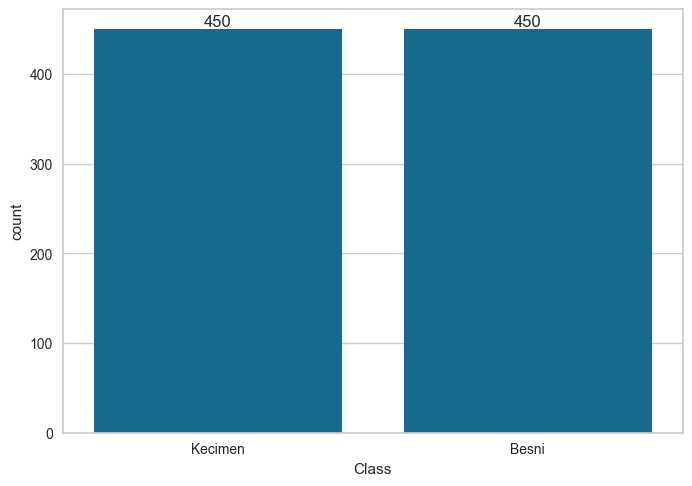

In [16]:
ax = sns.countplot(x="Class", data=df)
ax.bar_label(ax.containers[0]);

Our data is a balance data.

##### ***Features Summary***

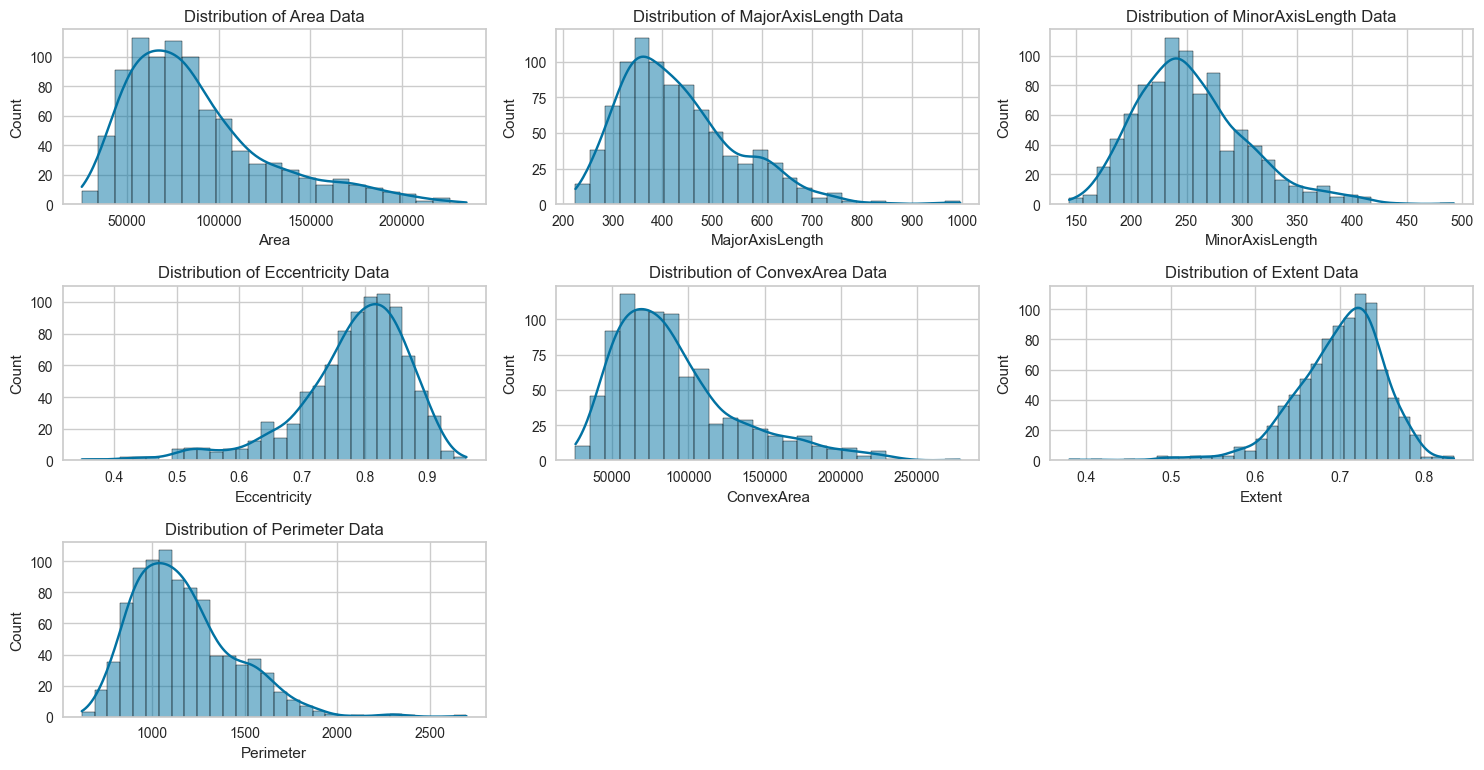

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.iloc[:, :-1], 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

In [18]:
num_cols = df.select_dtypes('number').columns

skew_limit = 0.75              # define a limit above which we will log
skew_vals = df[num_cols].skew()

# showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
ConvexArea,1.242904
Area,1.175237
Perimeter,1.017761
MajorAxisLength,0.989544
MinorAxisLength,0.800049
Extent,-1.151505
Eccentricity,-1.327503


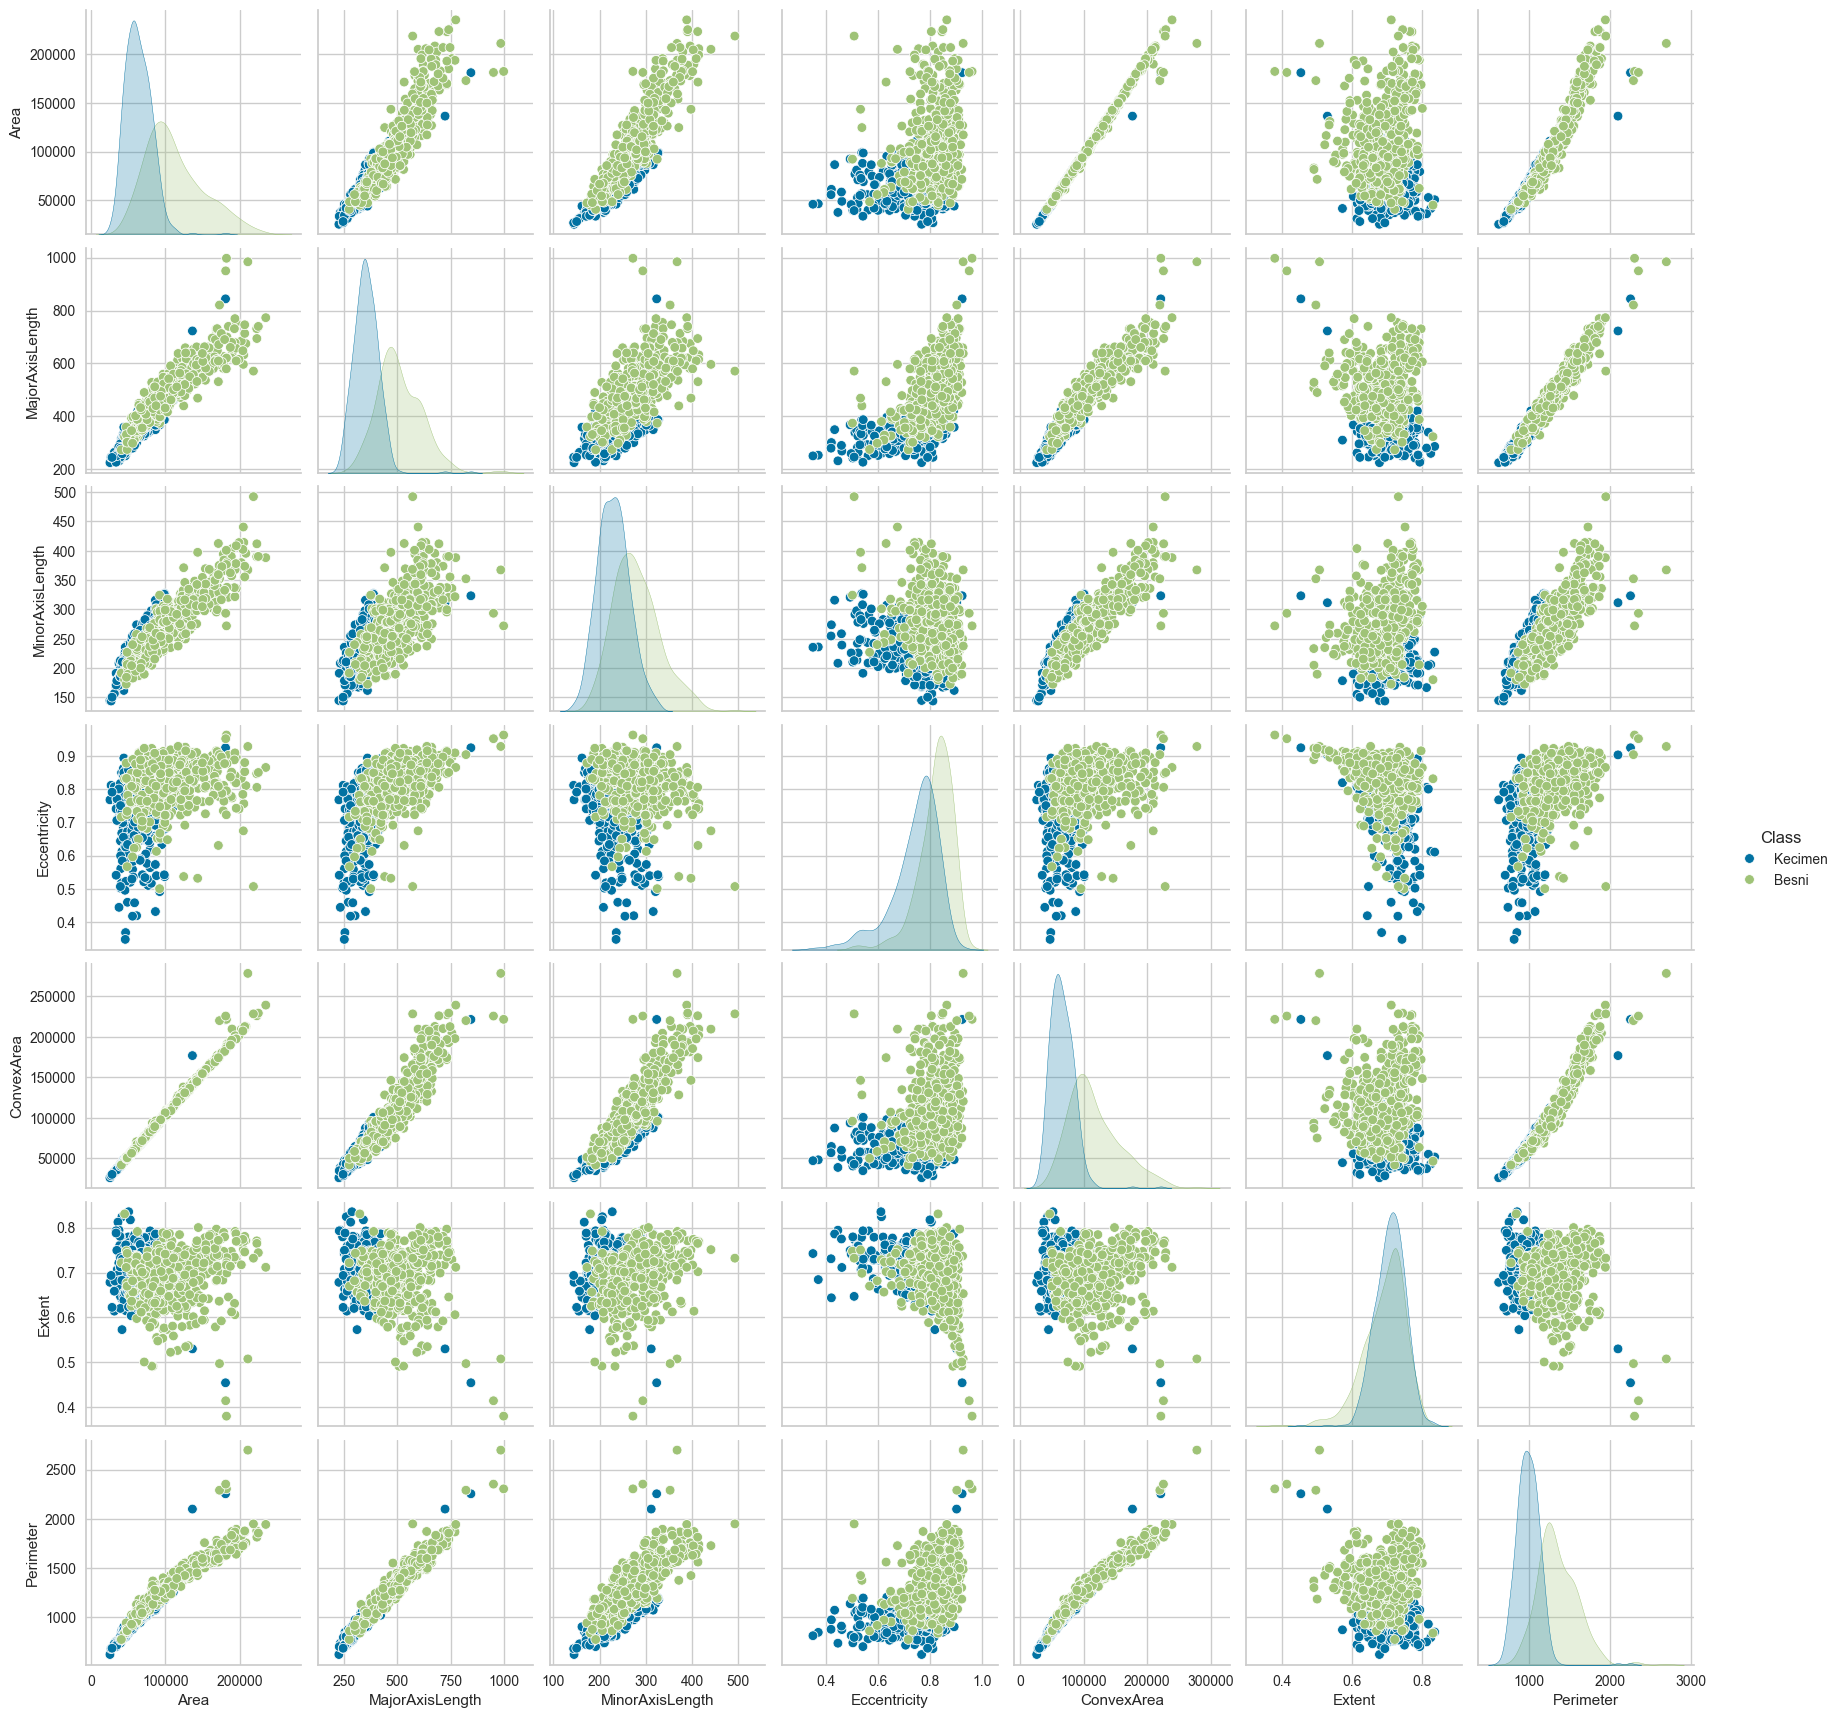

In [19]:
sns.pairplot(df, hue="Class");

In [21]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = px.scatter_3d(df, x='Perimeter', y='Area', z='Extent', color='Class', opacity=0.55)
fig.show()

##### ***Encoding Class***

In [22]:
df['Class'] = OneHotEncoder(drop='first').fit_transform(
    df[['Class']]).toarray().astype(int)

Kecimen = 1 , besni = 0

In [23]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


#### ***Detection of Outliers***

In [24]:
def plot_feature_outliers(df, hue_column):
    plt.figure(figsize=(15, 10))

    for i,col in enumerate(df.columns[:-1], 1):
        plt.subplot(4, 3, i)
        plt.title(f"Distribution of {col} Data with Outliers")
        sns.boxplot(x=hue_column, y=col, data=df)
        plt.tight_layout()
    plt.show()

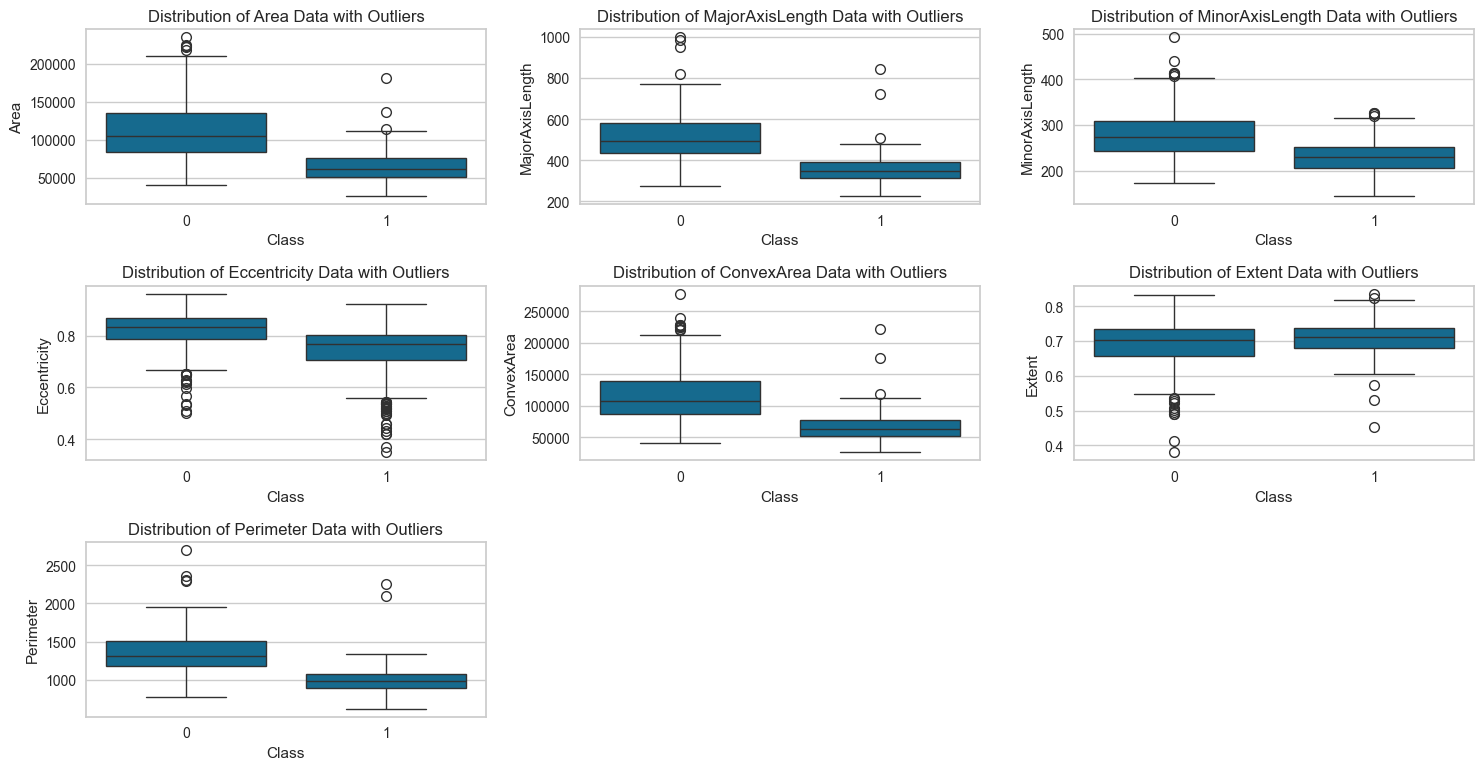

In [25]:
plot_feature_outliers(df, 'Class')

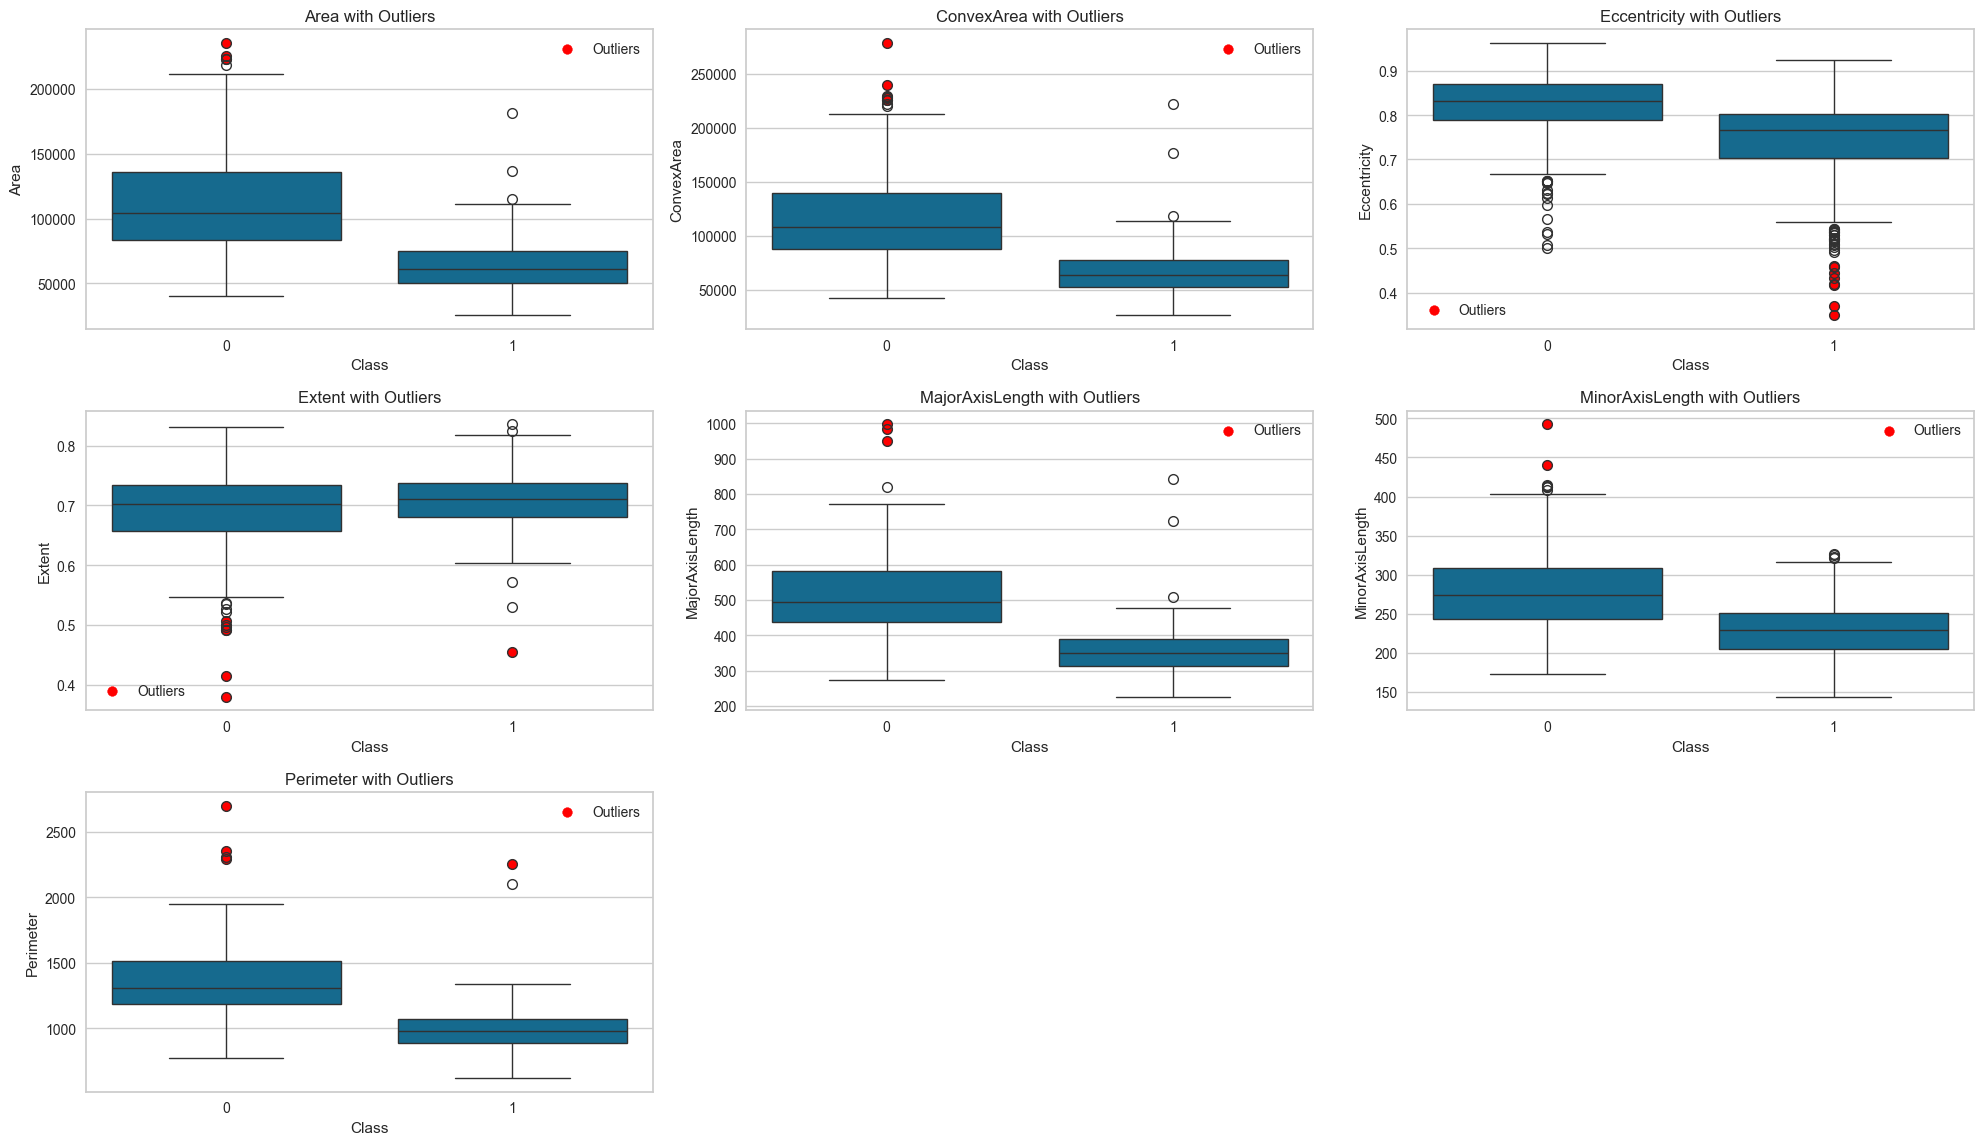

In [26]:
def detect_and_plot_outliers(df, target_column):
    features = df.columns.difference([target_column])

    # Create subplot
    plt.figure(figsize=(20, 15))

    for i,col in enumerate(features, 1):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Plotting
        plt.subplot(4, 3, i)
        sns.boxplot(x=target_column, y=col, data=df)
        plt.scatter(outliers[target_column], outliers[col], color='red', label='Outliers')
        plt.title(f"{col} with Outliers")
        plt.legend()
        plt.tight_layout()

    plt.show()

detect_and_plot_outliers(df, 'Class')

#### ***Correlation***

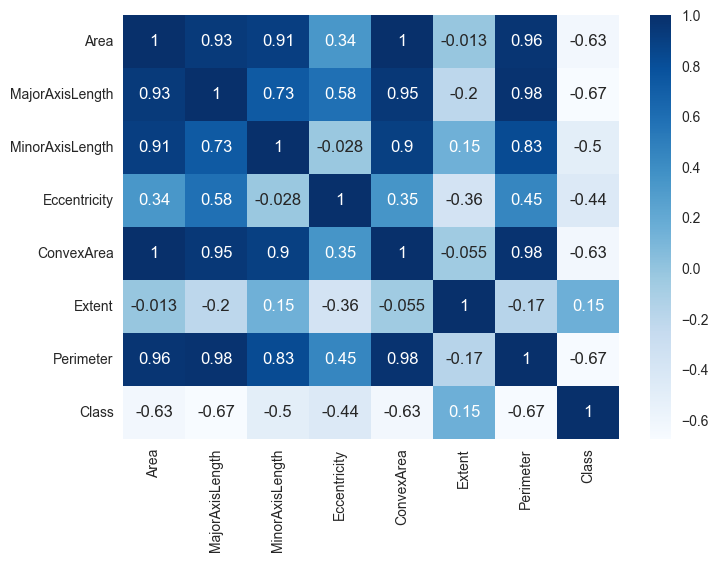

In [27]:
sns.heatmap(df.corr(), annot=True, cmap="Blues");

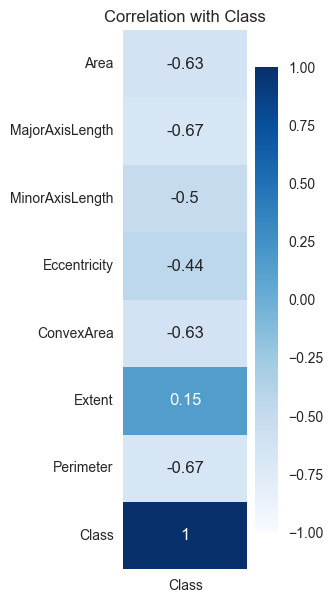

In [28]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()

    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()

plot_target_correlation_heatmap(df, 'Class')

##### ***Multicollinearity***

In [29]:
df.corr()[(df.corr() >= 0.9) & (df.corr() < 1)].any().any()

True

In [30]:
df.corr()[(df.corr() <= -0.9) & (df.corr() > -1)].any().any()

False

In [31]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


In [32]:
df.corr()['Class'].sort_values(key=abs, ascending=False)

Class              1.000000
MajorAxisLength   -0.673194
Perimeter         -0.665981
Area              -0.625715
ConvexArea        -0.625567
MinorAxisLength   -0.503102
Eccentricity      -0.438500
Extent             0.154689
Name: Class, dtype: float64

In [33]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [34]:
X = df.drop("Class", axis=1)
y = df['Class'] 

#### ***Models***

##### ***Train | Test Split***

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

#### ***Logistic Regression***

In [36]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [37]:
pipe_model["logistic"].coef_

array([[-3.15985727, -3.44283147, -1.1681642 , -3.1972357 , -2.72439745,
         1.32470167, -3.0620157 ]])

In [38]:
pipe_model.named_steps['scaler'].get_feature_names_out()

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'], dtype=object)

In [39]:
pipe_model["logistic"].intercept_

array([4.82707823])

X_test + y_yest + y_pred + y_pred_proba

In [40]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1])

In [41]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[5.03540186e-01, 4.96459814e-01],
       [2.35070863e-01, 7.64929137e-01],
       [2.45346433e-01, 7.54653567e-01],
       [3.86189880e-01, 6.13810120e-01],
       [2.02472580e-01, 7.97527420e-01],
       [4.87164862e-01, 5.12835138e-01],
       [1.07825110e-01, 8.92174890e-01],
       [6.79603071e-01, 3.20396929e-01],
       [1.99478173e-01, 8.00521827e-01],
       [4.59769443e-01, 5.40230557e-01],
       [8.15872643e-01, 1.84127357e-01],
       [2.02502269e-01, 7.97497731e-01],
       [9.91764874e-01, 8.23512608e-03],
       [4.50834974e-02, 9.54916503e-01],
       [1.72653128e-01, 8.27346872e-01],
       [9.95285263e-01, 4.71473668e-03],
       [3.06270772e-01, 6.93729228e-01],
       [2.57714479e-01, 7.42285521e-01],
       [1.11405898e-01, 8.88594102e-01],
       [6.31752826e-01, 3.68247174e-01],
       [8.31104593e-01, 1.68895407e-01],
       [3.08243080e-01, 6.91756920e-01],
       [3.18193294e-01, 6.81806706e-01],
       [7.96287110e-01, 2.03712890e-01],
       [4.558883

In [42]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
437,86141,414.107165,266.907528,0.764573,87883,0.718740,1146.164,1
131,70788,362.650770,249.403725,0.725972,71954,0.746158,1003.769,1
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,0
195,87302,392.910117,284.179068,0.690568,89605,0.738246,1122.160,1
230,54219,344.290832,204.496689,0.804491,56526,0.688495,931.430,1
...,...,...,...,...,...,...,...,...
191,87036,384.969903,289.453901,0.659292,88336,0.727896,1094.590,1
752,49691,336.678058,189.261667,0.827039,52077,0.724950,919.419,0
94,52243,331.451147,206.759599,0.781583,55774,0.714434,934.547,1
773,106938,498.433852,274.590275,0.834567,110118,0.773187,1285.854,0


In [43]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
437,86141,414.107165,266.907528,0.764573,87883,0.718740,1146.164,1,0.496460
131,70788,362.650770,249.403725,0.725972,71954,0.746158,1003.769,1,0.764929
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,0,0.754654
195,87302,392.910117,284.179068,0.690568,89605,0.738246,1122.160,1,0.613810
230,54219,344.290832,204.496689,0.804491,56526,0.688495,931.430,1,0.797527
...,...,...,...,...,...,...,...,...,...
191,87036,384.969903,289.453901,0.659292,88336,0.727896,1094.590,1,0.662079
752,49691,336.678058,189.261667,0.827039,52077,0.724950,919.419,0,0.829465
94,52243,331.451147,206.759599,0.781583,55774,0.714434,934.547,1,0.838924
773,106938,498.433852,274.590275,0.834567,110118,0.773187,1285.854,0,0.198151


In [44]:
test_data["pred"] = y_pred
test_data
test_data[((test_data["Class"] == 0) & (test_data["pred"] == 1)) |
          ((test_data["Class"] == 1) & (test_data["pred"] == 0))]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
437,86141,414.107165,266.907528,0.764573,87883,0.718740,1146.164,1,0.496460,0
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,0,0.754654,1
731,84383,403.909415,271.251509,0.740945,87629,0.674945,1140.605,0,0.512835,1
546,88928,395.724998,300.227002,0.651468,93821,0.671064,1239.540,0,0.540231,1
831,48488,275.337717,226.802199,0.566991,50103,0.669594,859.326,0,0.954917,1
688,57999,311.022470,243.476121,0.622242,61519,0.656335,968.697,0,0.888594,1
885,54502,346.457978,204.081212,0.808096,56464,0.636111,927.283,0,0.767425,1
717,58870,355.136018,212.029460,0.802213,60490,0.734956,940.363,0,0.788287,1
92,85156,422.279133,260.210623,0.787586,87057,0.702561,1140.684,1,0.459444,0
271,84057,452.775695,245.219982,0.840641,86710,0.622018,1179.024,1,0.311209,0


##### ***Model Performance***

In [45]:
confusion_matrix(y_test, y_pred)

array([[70, 13],
       [ 8, 89]], dtype=int64)

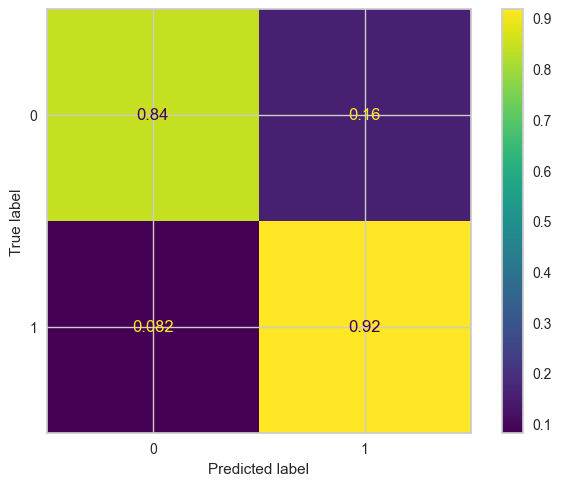

In [46]:
log_pipe_matrix = ConfusionMatrixDisplay.from_estimator(pipe_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true')
log_pipe_matrix

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test,i):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

##### ***Cross Validate***

In [48]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.015494,0.014576,0.888889,0.854938,0.885714,0.835329,0.885714,0.877358,0.885714,0.855828
2,0.005853,0.016041,0.902778,0.854938,0.911765,0.831361,0.885714,0.883648,0.898551,0.856707
3,0.011587,0.013730,0.819444,0.862654,0.843750,0.839763,0.771429,0.889937,0.805970,0.864122
4,0.007661,0.006718,0.847222,0.861111,0.815789,0.841317,0.885714,0.883648,0.849315,0.861963
5,0.003187,0.009605,0.833333,0.859568,0.780488,0.840841,0.914286,0.880503,0.842105,0.860215
6,0.011512,0.009773,0.888889,0.856481,0.864865,0.835821,0.914286,0.880503,0.888889,0.857580
7,0.010319,0.008053,0.930556,0.850309,0.916667,0.831832,0.942857,0.871069,0.929577,0.850998
8,0.002992,0.008062,0.791667,0.868827,0.744186,0.853659,0.888889,0.883281,0.810127,0.868217
9,0.008961,0.015378,0.791667,0.865741,0.800000,0.844311,0.777778,0.889590,0.788732,0.866359
10,0.007358,0.008136,0.875000,0.858025,0.846154,0.839879,0.916667,0.876972,0.880000,0.858025


In [49]:
df_scores.mean()[2:] 

test_accuracy      0.856944
train_accuracy     0.859259
test_precision     0.840938
train_precision    0.839411
test_recall        0.878333
train_recall       0.881651
test_f1            0.857898
train_f1           0.860002
dtype: float64

In [50]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "logistic")

logistic Test_Set
[[70 13]
 [ 8 89]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        83
           1       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


logistic Train_Set
[[308  59]
 [ 42 311]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       367
           1       0.84      0.88      0.86       353

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



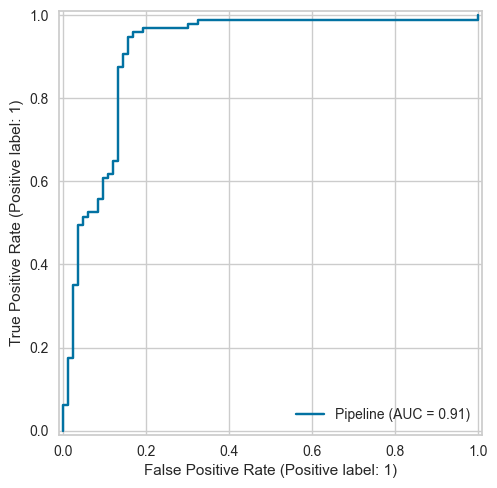

In [51]:
log_pipe_ROC = RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
log_pipe_ROC

##### ***GridSearchCV***

In [52]:
scaler = MinMaxScaler()
log_model = LogisticRegression()

model = Pipeline([("scaler", scaler), ("log_model", log_model)])
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1], 
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}


grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',   
    n_jobs=-1)

In [53]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [54]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

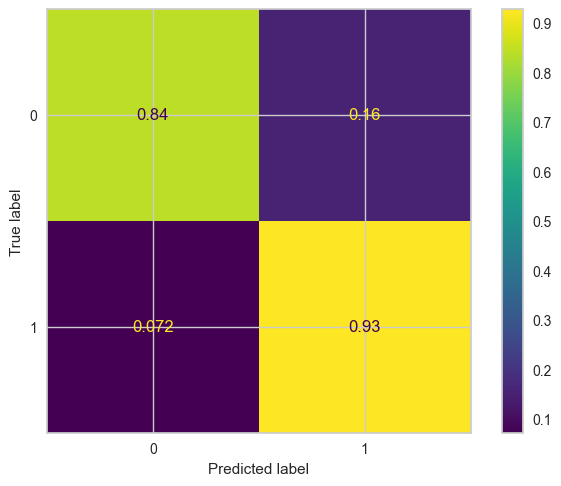

In [55]:
log_grid_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true')
log_grid_matrix

In [56]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, "logisticgrid")

logisticgrid Test_Set
[[70 13]
 [ 7 90]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        83
           1       0.87      0.93      0.90        97

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


logisticgrid Train_Set
[[309  58]
 [ 40 313]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       367
           1       0.84      0.89      0.86       353

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



##### ***ROC (Receiver Operating Curve)***

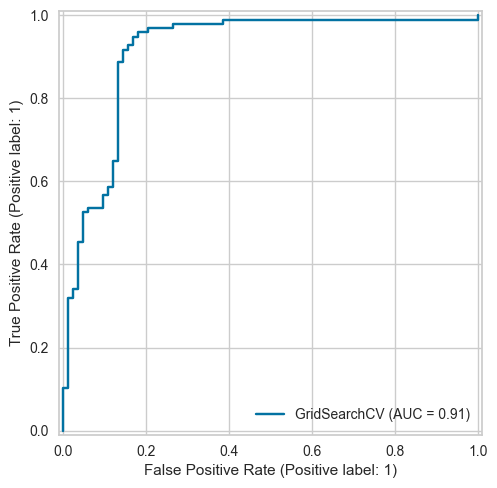

In [57]:
log_grid_ROC = RocCurveDisplay.from_estimator(grid_model, X_test, y_test)
log_grid_ROC

In [58]:
df1 = df.copy()

##### ***Logistic With Transformation***

In [59]:
# Select the columns of interest
columns_of_interest = [
    'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
    'Extent', 'Perimeter'
]

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

# Apply the Yeo-Johnson transformation to the selected columns
df1[columns_of_interest] = power_transformer.fit_transform(
    df1[columns_of_interest])

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,-2.210577e-15,1.000556,-3.107110,-0.710225,0.000939,0.672887,2.358645
MajorAxisLength,900.0,4.357995e-15,1.000556,-2.726264,-0.710980,-0.026095,0.704346,2.886644
MinorAxisLength,900.0,-7.358065e-15,1.000556,-3.195617,-0.672585,-0.006777,0.620814,3.189945
Eccentricity,900.0,1.263187e-16,1.000556,-2.535103,-0.662466,0.026363,0.683066,3.233417
ConvexArea,900.0,4.105358e-15,1.000556,-3.183118,-0.714198,-0.002160,0.663212,2.580769
Extent,900.0,-4.026409e-16,1.000556,-3.251373,-0.672369,0.027789,0.648923,3.751198
Perimeter,900.0,5.425389e-14,1.000556,-3.204105,-0.703709,-0.005496,0.674711,3.159954
Class,900.0,5.000000e-01,0.500278,0.000000,0.000000,0.500000,1.000000,1.000000


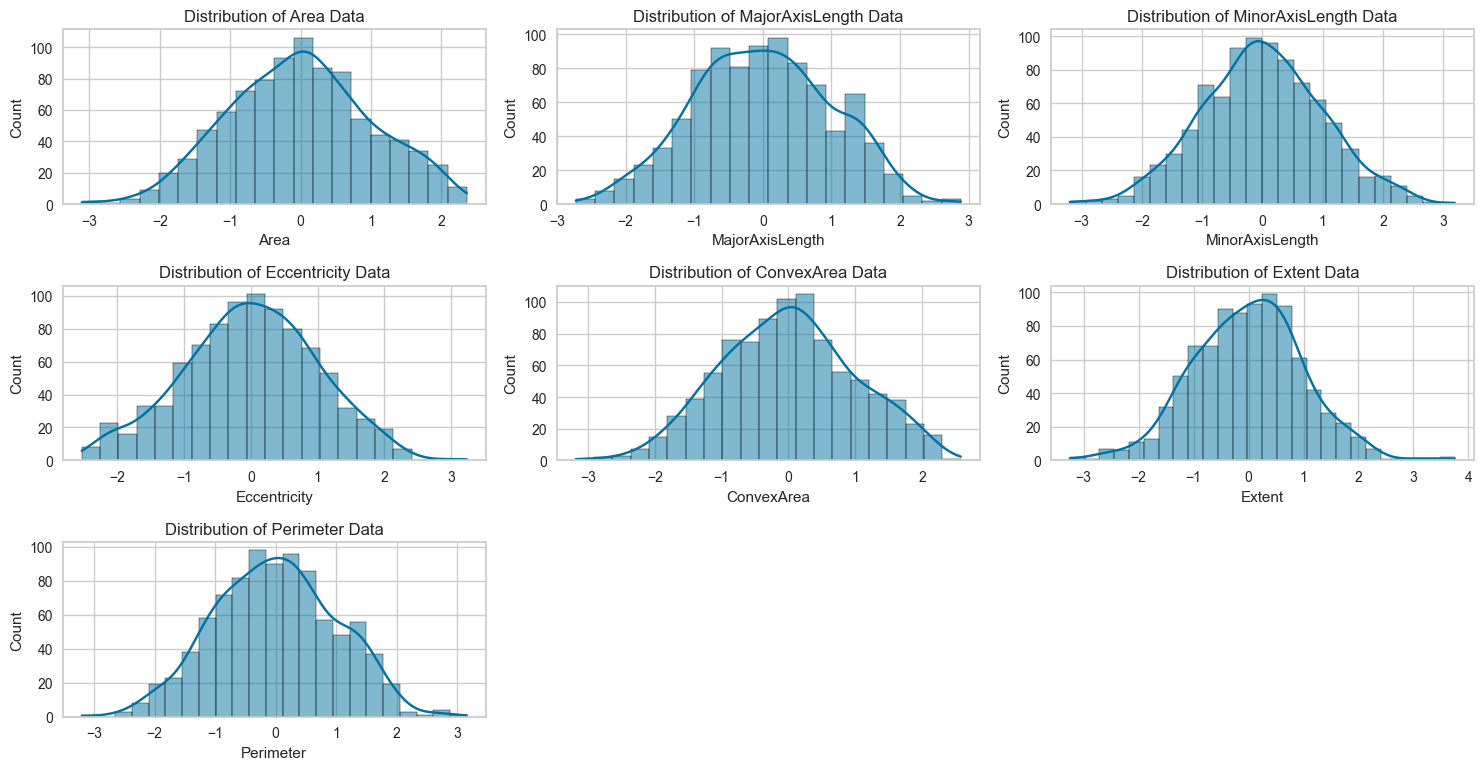

In [61]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df1.iloc[:, :-1],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df1[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [62]:
X1 = df1.drop("Class", axis=1)
y1 = df1['Class'] 

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                        y1,
                                                        test_size=0.2,
                                                        random_state=10)

In [64]:
scaler = StandardScaler()
log_model = LogisticRegression()

# pipeline for logistic regression
model = Pipeline([("scaler", scaler), ("log_model", log_model)])
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1], 
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}


grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',   
    n_jobs=-1)

In [65]:
grid_model.fit(X1_train, y1_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [66]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'saga'}

In [67]:
grid_model.best_index_

19

##### ***Model Performance***

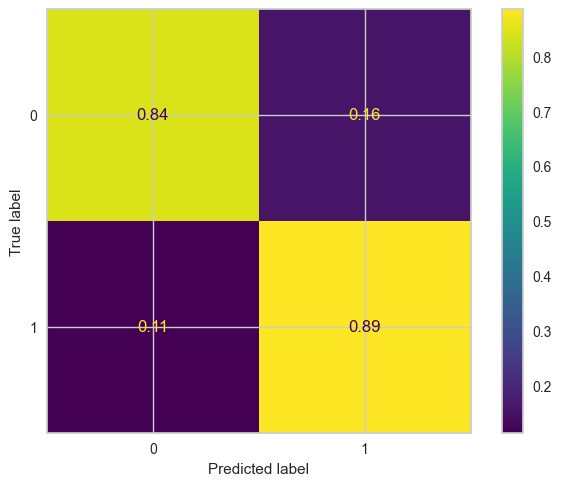

In [68]:
log_transform_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,
                                                             X1_test,
                                                             y1_test,
                                                             normalize='true')
log_transform_matrix

In [69]:
eval_metric(grid_model, X1_train, y1_train, X1_test, y1_test,
            "logisticgrid_transform")

logisticgrid_transform Test_Set
[[70 13]
 [11 86]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        83
           1       0.87      0.89      0.88        97

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.87       180
weighted avg       0.87      0.87      0.87       180


logisticgrid_transform Train_Set
[[318  49]
 [ 48 305]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       367
           1       0.86      0.86      0.86       353

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



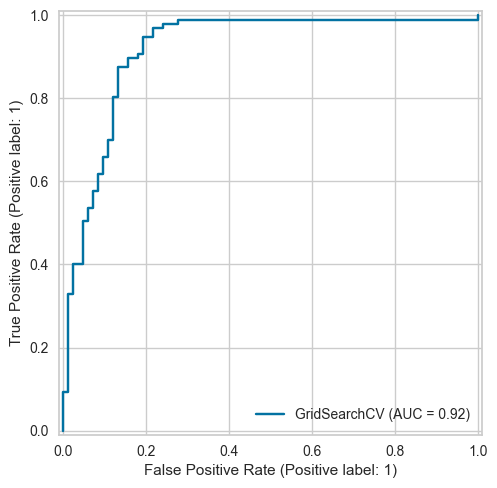

In [70]:
log_transform_ROC = RocCurveDisplay.from_estimator(grid_model, X1_test,
                                                   y1_test)
log_transform_ROC

#### ***Compare Logistic Regression Models***

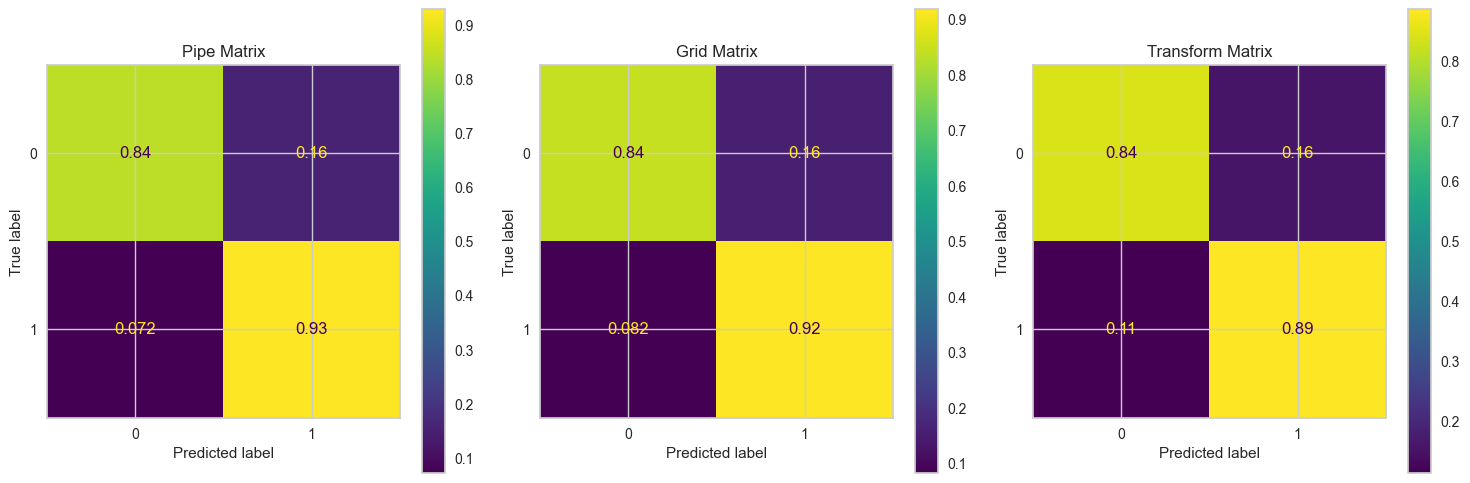

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

log_pipe_matrix.plot(ax=ax[1])
ax[0].set_title("Pipe Matrix")
log_grid_matrix.plot(ax=ax[0])
ax[1].set_title("Grid Matrix")
log_transform_matrix.plot(ax=ax[2])
ax[2].set_title("Transform Matrix")

plt.tight_layout()
plt.show()

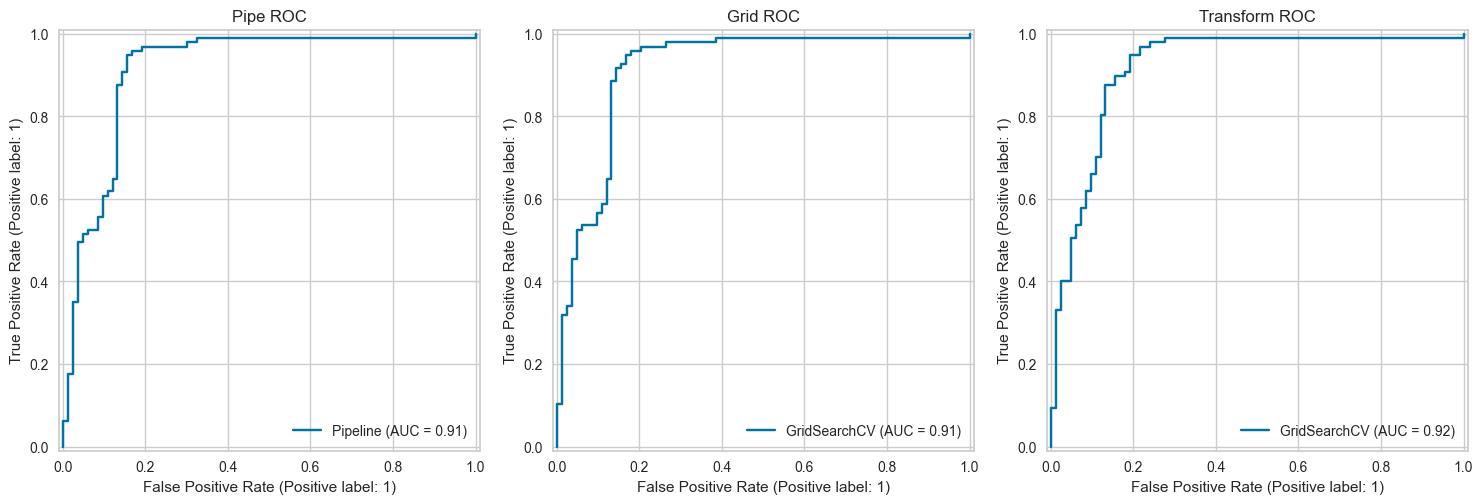

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

log_pipe_ROC.plot(ax=ax[0])
ax[0].set_title("Pipe ROC")
log_grid_ROC.plot(ax=ax[1])
ax[1].set_title("Grid ROC")
log_transform_ROC.plot(ax=ax[2])
ax[2].set_title("Transform ROC")

plt.tight_layout()
plt.show()

In [73]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "logistic")

eval_metric(grid_model, X_train, y_train, X_test, y_test, "logisticgrid")

eval_metric(grid_model, X1_train, y1_train, X1_test, y1_test, "logisticgrid_transform")

logistic Test_Set
[[70 13]
 [ 8 89]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        83
           1       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


logistic Train_Set
[[308  59]
 [ 42 311]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       367
           1       0.84      0.88      0.86       353

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720

logisticgrid Test_Set
[[ 0 83]
 [ 0 97]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.54      1.00      0.70        97

    accuracy                           0.54       180
   macr

#### ***KNN*** 

In [74]:
operations = [("scaler", MinMaxScaler()),
              ("knn", KNeighborsClassifier(n_neighbors=5))
              ]  #default n_neighbors=5

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [75]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1])

In [76]:
y_pred_proba = pipe_model.predict_proba(X_test)
pd.DataFrame(y_pred_proba)

,0,1
0,0.2,0.8
1,0.2,0.8
2,0.4,0.6
3,0.4,0.6
4,0.0,1.0
...,...,...
175,0.4,0.6
176,0.4,0.6
177,0.0,1.0
178,1.0,0.0


In [77]:
y_pred = pipe_model.predict(X_test)
my_dict = {
    "Actual": y_test,
    "Pred": y_pred,
    "Proba_1": y_pred_proba[:, 1],
    "Proba_0": y_pred_proba[:, 0]
}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
217,1,1,1.0,0.0
538,0,0,0.0,1.0
752,0,1,0.6,0.4
43,1,1,0.8,0.2
124,1,0,0.2,0.8
349,1,0,0.2,0.8
822,0,1,1.0,0.0
604,0,1,0.6,0.4
85,1,0,0.2,0.8
586,0,0,0.0,1.0


In [78]:
test_data["pred"] = y_pred
test_data
test_data[((test_data["Class"] == 0) & (test_data["pred"] == 1)) |
          ((test_data["Class"] == 1) & (test_data["pred"] == 0))]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,0,0.754654,1
731,84383,403.909415,271.251509,0.740945,87629,0.674945,1140.605,0,0.512835,1
831,48488,275.337717,226.802199,0.566991,50103,0.669594,859.326,0,0.954917,1
688,57999,311.022470,243.476121,0.622242,61519,0.656335,968.697,0,0.888594,1
425,85954,405.915167,272.083325,0.742094,87690,0.714818,1104.717,1,0.544112,0
885,54502,346.457978,204.081212,0.808096,56464,0.636111,927.283,0,0.767425,1
717,58870,355.136018,212.029460,0.802213,60490,0.734956,940.363,0,0.788287,1
173,68627,411.888524,216.894000,0.850123,70932,0.738242,1097.292,1,0.576035,0
604,102013,453.893458,292.130181,0.765354,106036,0.637828,1266.255,0,0.242353,1
571,79492,422.567329,243.116296,0.817920,82708,0.637353,1122.831,0,0.427674,1


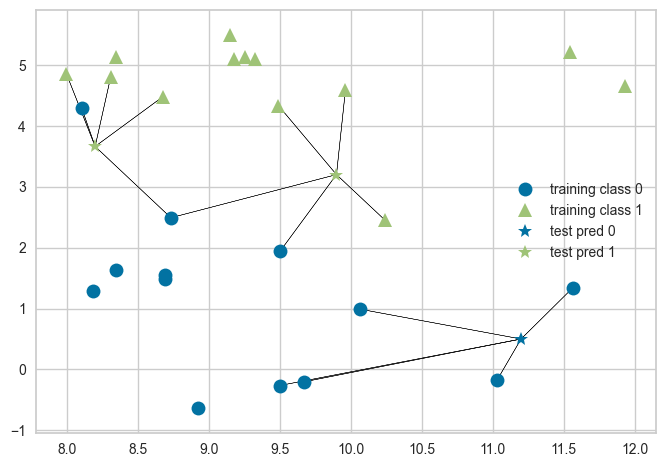

In [79]:
# pip install mglearn
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=5)

##### ***Model Performance***

In [80]:
confusion_matrix(y_test, y_pred)

array([[67, 16],
       [11, 86]], dtype=int64)

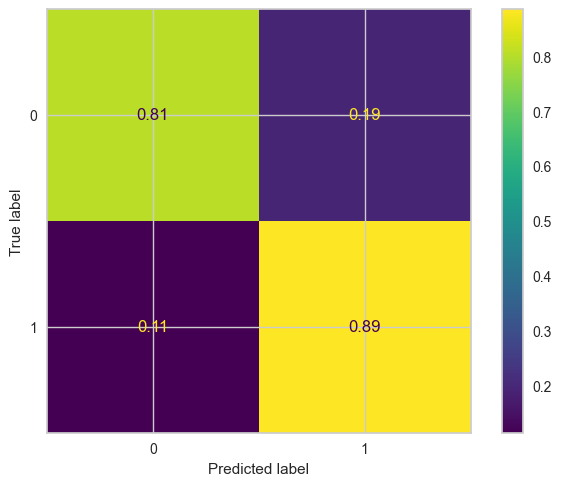

In [81]:
knn_matrix = ConfusionMatrixDisplay.from_estimator(pipe_model,
                                                   X_test,
                                                   y_test,
                                                   normalize='true')
knn_matrix

In [82]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "knn")

knn Test_Set
[[67 16]
 [11 86]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        83
           1       0.84      0.89      0.86        97

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180


knn Train_Set
[[317  50]
 [ 32 321]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       367
           1       0.87      0.91      0.89       353

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



##### ***Elbow Method for Choosing Reasonable K Values***

In [83]:
test_error_rates = []

for k in range(1, 30):

    operations = [("scaler", MinMaxScaler()),
                  ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    scores = cross_validate(knn_pipe_model,
                            X_train,
                            y_train,
                            scoring=['accuracy'],
                            cv=10)

    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean

    test_error_rates.append(test_error)

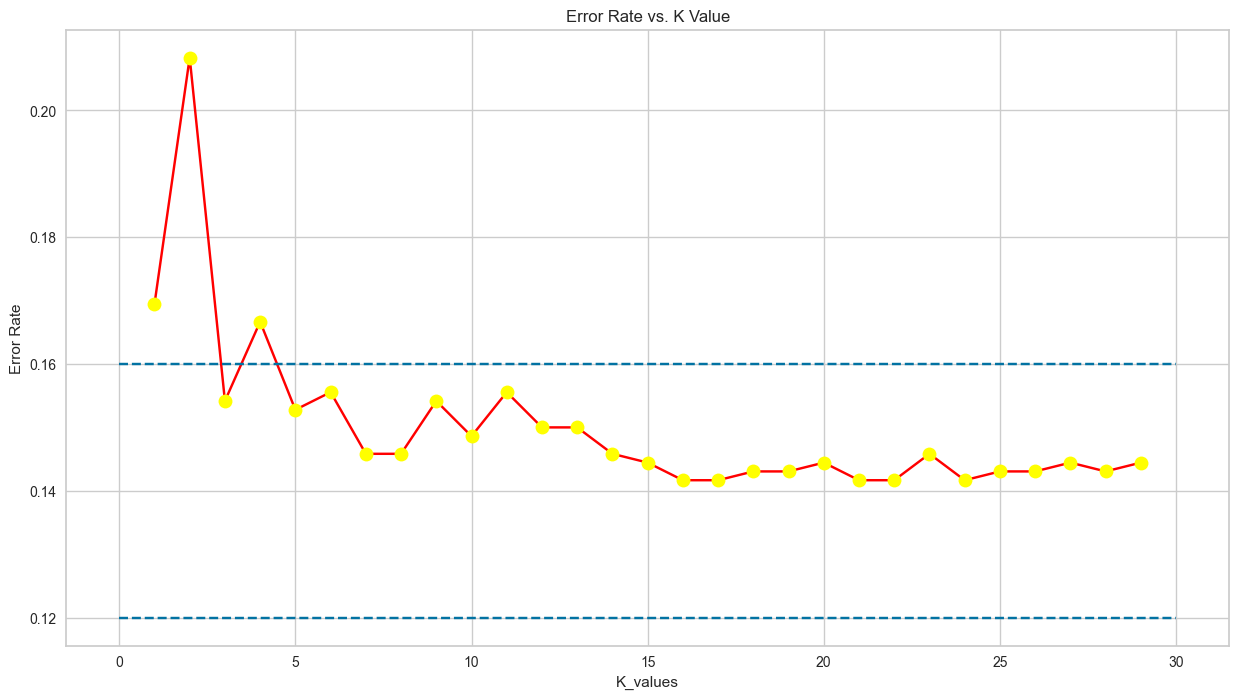

In [84]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.12, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.16, xmin=0, xmax=30, colors='b', linestyles="--")

##### ***Overfiting and underfiting control for k values***

In [85]:
test_error_rates = []
train_error_rates = []

for k in range(1, 30):

    operations = [("scaler", MinMaxScaler()),
                  ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model,
                            X_train,
                            y_train,
                            scoring=['accuracy'],
                            cv=10,
                            return_train_score=True)

    accuracy_test_mean = scores["test_accuracy"].mean()
    accuracy_train_mean = scores["train_accuracy"].mean()

    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

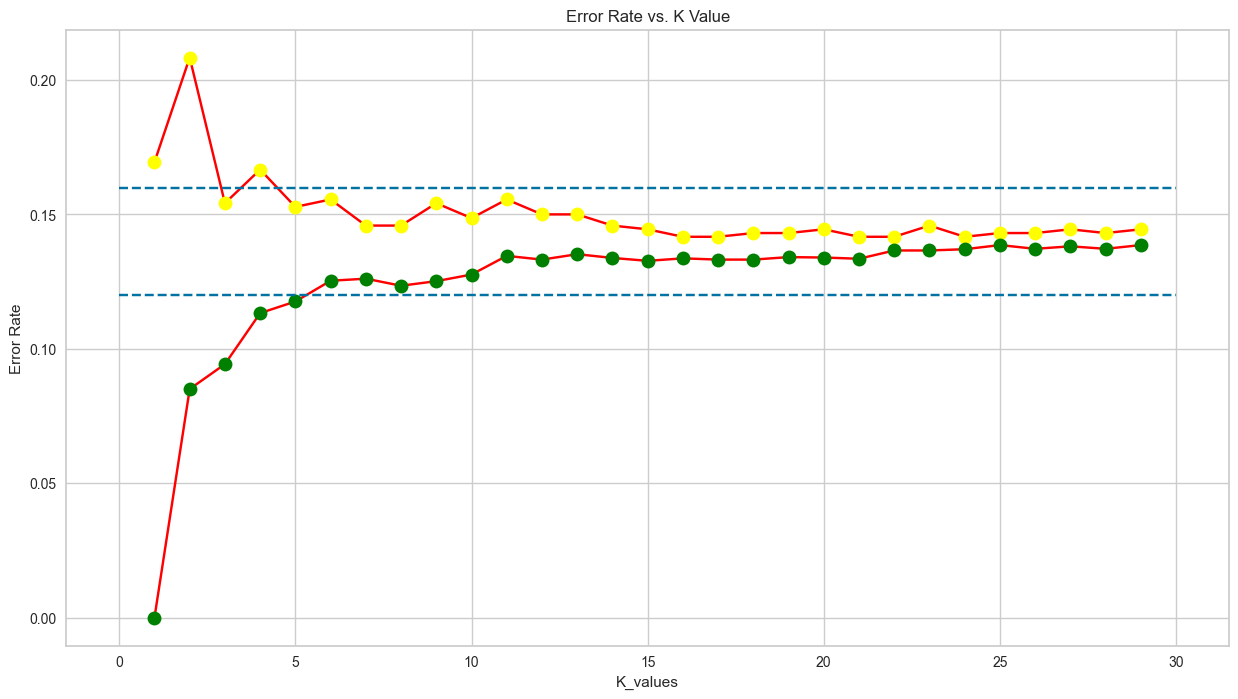

In [86]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.plot(range(1, 30),
         train_error_rates,
         color='red',
         marker='o',
         markerfacecolor='green',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.12, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.16, xmin=0, xmax=30, colors='b', linestyles="--")

##### ***Scores by Various K Values***

In [87]:
k_list = [3, 4, 6, 7, 8, 16]

for i in k_list:
    operations = [("scaler", MinMaxScaler()),
                  ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test, "knn_elbow")

WITH K=3

knn_elbow Test_Set
[[67 16]
 [13 84]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        83
           1       0.84      0.87      0.85        97

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


knn_elbow Train_Set
[[325  42]
 [ 26 327]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       367
           1       0.89      0.93      0.91       353

    accuracy                           0.91       720
   macro avg       0.91      0.91      0.91       720
weighted avg       0.91      0.91      0.91       720

WITH K=4

knn_elbow Test_Set
[[73 10]
 [18 79]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        83
           1       0.89      0.81      0.85        97

    accuracy                           0.8

##### ***Cross Validate For Optimal K Value***

In [88]:
operations = [("scaler", MinMaxScaler()),
              ("knn", KNeighborsClassifier(n_neighbors=15))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.006540,0.029250,0.847222,0.870370,0.833333,0.846154,0.857143,0.899371,0.845070,0.871951
2,0.006193,0.019759,0.875000,0.862654,0.861111,0.831884,0.885714,0.902516,0.873239,0.865762
3,0.009500,0.012242,0.888889,0.865741,0.864865,0.844776,0.914286,0.889937,0.888889,0.866769
4,0.000000,0.014809,0.847222,0.859568,0.815789,0.840841,0.885714,0.880503,0.849315,0.860215
5,0.000000,0.013397,0.805556,0.878086,0.744186,0.854599,0.914286,0.905660,0.820513,0.879389
6,0.012611,0.005137,0.875000,0.858025,0.825000,0.832353,0.942857,0.889937,0.880000,0.860182
7,0.008290,0.011184,0.902778,0.865741,0.911765,0.838710,0.885714,0.899371,0.898551,0.867982
8,0.002556,0.017339,0.833333,0.876543,0.785714,0.858006,0.916667,0.895899,0.846154,0.876543
9,0.007063,0.021045,0.791667,0.875000,0.800000,0.845029,0.777778,0.911672,0.788732,0.877086
10,0.000997,0.010235,0.888889,0.861111,0.868421,0.825215,0.916667,0.908517,0.891892,0.864865


In [89]:
df_scores.mean()[2:]

test_accuracy      0.855556
train_accuracy     0.867284
test_precision     0.831018
train_precision    0.841757
test_recall        0.889683
train_recall       0.898338
test_f1            0.858236
train_f1           0.869074
dtype: float64

##### ***Gridsearch Method for Choosing Reasonable K Values***

In [90]:
operations = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [91]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [92]:
k_values = range(1,30)

In [93]:
param_grid = [
    {
        "knn__n_neighbors": k_values,
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform']
    },
    {
        "knn__n_neighbors": k_values,
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [94]:
knn_grid_model = GridSearchCV(knn_model,
                              param_grid,
                              scoring='accuracy',
                              cv=10,
                              return_train_score=True,
                              n_jobs=-1)

In [95]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [96]:
knn_grid_model.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 28, 'knn__weights': 'uniform'}

In [97]:
knn_grid_model.best_estimator_ 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=28))])

In [98]:
knn_grid_model.best_index_

56

In [99]:
pd.DataFrame(
    knn_grid_model.cv_results_).loc[56,
                                    ["mean_test_score", "mean_train_score"]]

mean_test_score       0.8625
mean_train_score    0.865586
Name: 56, dtype: object

In [100]:
knn_grid_model.best_score_

0.8625

In [101]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test, "knn_grid")

WITH K=29

knn_grid Test_Set
[[71 12]
 [ 7 90]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        83
           1       0.88      0.93      0.90        97

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


knn_grid Train_Set
[[306  61]
 [ 40 313]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       367
           1       0.84      0.89      0.86       353

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [102]:
confusion_matrix(y_test, y_pred)

array([[67, 16],
       [11, 86]], dtype=int64)

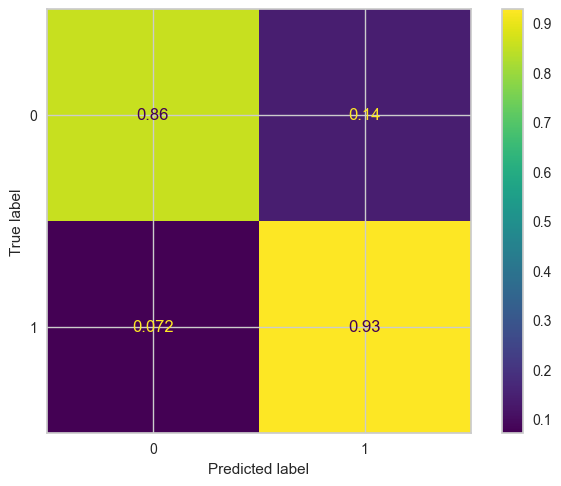

In [103]:
knn_grid_matrix = ConfusionMatrixDisplay.from_estimator(knn_grid_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true')
knn_grid_matrix

##### ***Evaluating ROC Curves***

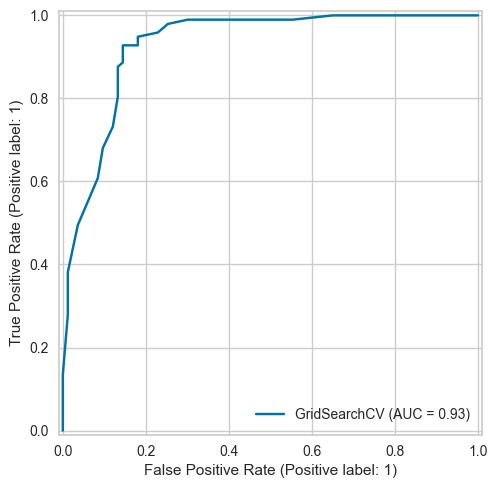

In [104]:
knn_grid_ROC = RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);
knn_grid_ROC

In [105]:
y_pred_proba = knn.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9255993044342318

#### ***SVM***

In [106]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

##### ***Model Performance***

In [107]:
pipe_model.fit(X_train, y_train)

eval_metric(pipe_model, X_train, y_train, X_test, y_test, "svm")

svm Test_Set
[[68 15]
 [ 4 93]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        83
           1       0.86      0.96      0.91        97

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


svm Train_Set
[[306  61]
 [ 34 319]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       367
           1       0.84      0.90      0.87       353

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [108]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.865278
train_accuracy     0.867901
test_precision     0.840013
train_precision    0.839448
test_recall        0.901032
train_recall       0.903376
test_f1            0.868530
train_f1           0.870225
dtype: float64

##### ***GridsearchCV***

In [109]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'SVC': SVC(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [110]:
param_grid = {
    'SVC__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
    'SVC__kernel': ['rbf', 'linear'],
    'SVC__class_weight': ["balanced", None]
}

In [111]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="accuracy",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

In [112]:
svm_model_grid.best_params_

{'SVC__C': 0.5,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

In [113]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', SVC(C=0.5, class_weight='balanced', probability=True))])

In [114]:
svm_model_grid.best_index_

80

In [115]:
pd.DataFrame(
    svm_model_grid.cv_results_).loc[80,
                                    ["mean_test_score", "mean_train_score"]]

mean_test_score       0.8625
mean_train_score    0.865278
Name: 80, dtype: object

In [116]:
svm_model_grid.best_score_

0.8625

In [117]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test, "svm_grid")

svm_grid Test_Set
[[68 15]
 [ 4 93]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        83
           1       0.86      0.96      0.91        97

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


svm_grid Train_Set
[[305  62]
 [ 34 319]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       367
           1       0.84      0.90      0.87       353

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



##### ***Evaluating ROC Curves***

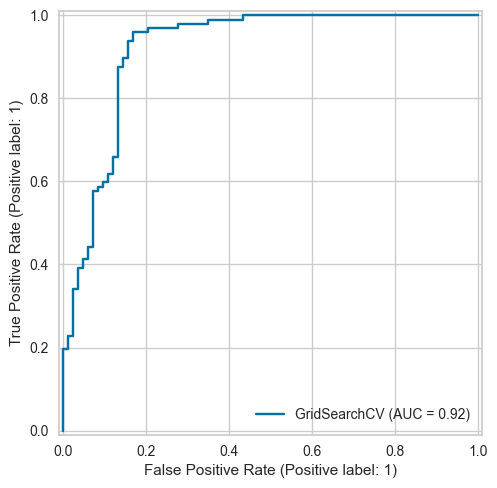

In [118]:
svm_grid_ROC = RocCurveDisplay.from_estimator(svm_model_grid, X_test, y_test);
svm_grid_ROC

In [119]:
y_pred_proba = svm_model_grid.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.918767854924854

In [120]:
decision_function = svm_model_grid.decision_function(X_test)
average_precision_score(y_test, decision_function)

0.9095357041156814

In [121]:
df1 = df.copy()

##### ***SVM Model Transformation***

In [122]:
# Select the columns of interest
columns_of_interest = [
    'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
    'Extent', 'Perimeter'
]

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

# Apply the Yeo-Johnson transformation to the selected columns
df1[columns_of_interest] = power_transformer.fit_transform(
    df1[columns_of_interest])

In [123]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,-2.210577e-15,1.000556,-3.107110,-0.710225,0.000939,0.672887,2.358645
MajorAxisLength,900.0,4.357995e-15,1.000556,-2.726264,-0.710980,-0.026095,0.704346,2.886644
MinorAxisLength,900.0,-7.358065e-15,1.000556,-3.195617,-0.672585,-0.006777,0.620814,3.189945
Eccentricity,900.0,1.263187e-16,1.000556,-2.535103,-0.662466,0.026363,0.683066,3.233417
ConvexArea,900.0,4.105358e-15,1.000556,-3.183118,-0.714198,-0.002160,0.663212,2.580769
Extent,900.0,-4.026409e-16,1.000556,-3.251373,-0.672369,0.027789,0.648923,3.751198
Perimeter,900.0,5.425389e-14,1.000556,-3.204105,-0.703709,-0.005496,0.674711,3.159954
Class,900.0,5.000000e-01,0.500278,0.000000,0.000000,0.500000,1.000000,1.000000


In [124]:
X1 = df1.drop("Class", axis=1)
y1 = df1['Class'] 

In [125]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                        y1,
                                                        test_size=0.2,
                                                        random_state=10)

In [126]:
param_grid = {
    'SVC__C': [0.01, 0.1, 0.5, 1, 50],
    'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5, 1],
    'SVC__kernel': ['rbf', 'linear']
}

In [127]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="accuracy",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X1_train, y1_train)

In [128]:
svm_model_grid.best_params_

{'SVC__C': 50, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}

In [129]:
svm_model_grid.best_index_

49

In [130]:
pd.DataFrame(
    svm_model_grid.cv_results_).loc[49,
                                    ["mean_test_score", "mean_train_score"]]

mean_test_score     0.873611
mean_train_score    0.874653
Name: 49, dtype: object

In [131]:
svm_model_grid.best_score_

0.8736111111111111

In [132]:
eval_metric(svm_model_grid, X1_train, y1_train, X1_test, y1_test, "svm_transform__grid")

svm_transform__grid Test_Set
[[70 13]
 [ 9 88]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        83
           1       0.87      0.91      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


svm_transform__grid Train_Set
[[324  43]
 [ 47 306]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       367
           1       0.88      0.87      0.87       353

    accuracy                           0.88       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.88      0.87       720



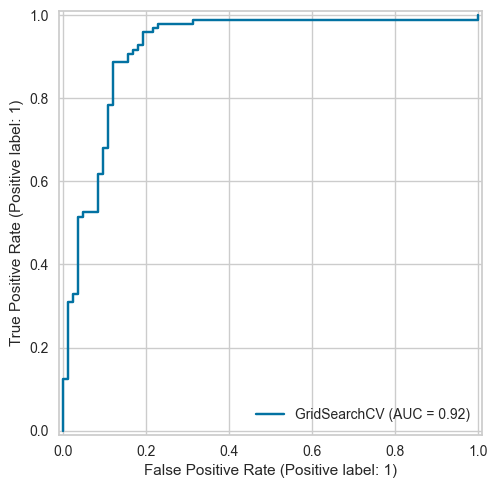

In [133]:
RocCurveDisplay.from_estimator(svm_model_grid, X1_test, y1_test);

#### ***Desicion Tree Classification***

In [134]:
operations = [("DT_model", DecisionTreeClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('DT_model', DecisionTreeClassifier())])

##### ***Model Performance***

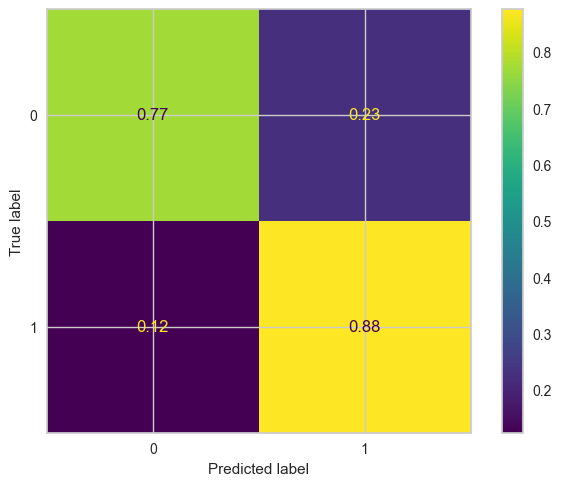

In [135]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true');

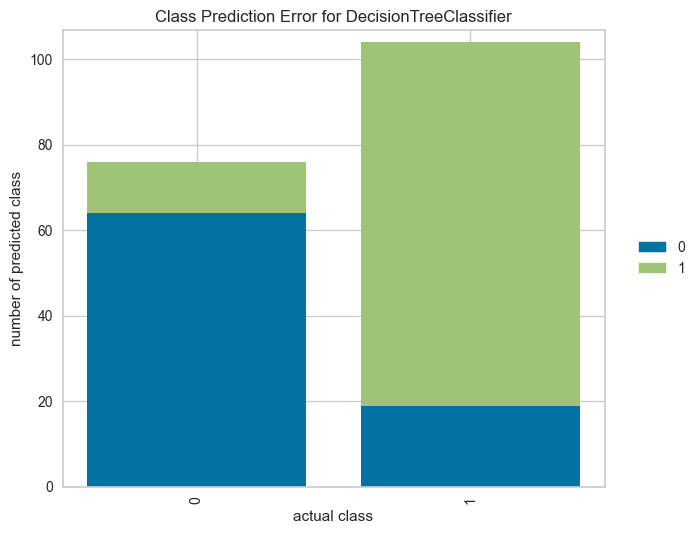

In [136]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [137]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "DT")

DT Test_Set
[[64 19]
 [12 85]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81        83
           1       0.82      0.88      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.83       180
weighted avg       0.83      0.83      0.83       180


DT Train_Set
[[367   0]
 [  0 353]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       353

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



##### ***Cross Validation (CV)***

In [138]:
operations = [("DT_model", DecisionTreeClassifier())]
model = Pipeline(steps=operations)
scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=["accuracy"],
    cv=10,
    return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy
1,0.011368,0.004020,0.861111,1.0
2,0.010971,0.002992,0.847222,1.0
3,0.009974,0.004022,0.763889,1.0
4,0.009010,0.001995,0.833333,1.0
5,0.007979,0.002991,0.791667,1.0
6,0.009938,0.003025,0.847222,1.0
7,0.009974,0.002991,0.847222,1.0
8,0.007991,0.001981,0.888889,1.0
9,0.007946,0.002028,0.722222,1.0
10,0.006978,0.002000,0.847222,1.0


In [139]:
df_scores.mean()[2:]

test_accuracy     0.825
train_accuracy    1.000
dtype: float64

##### ***Overfitting Risk and Features Importance in Decision Trees***

In [140]:
pipe_model["DT_model"].feature_importances_

array([0.04078112, 0.13179611, 0.06954736, 0.08029177, 0.02547593,
       0.06843749, 0.58367024])

In [141]:
X_train.head(1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
722,126149,478.877101,345.919972,0.691521,134778,0.624908,1549.185


In [142]:
df_fi = pd.DataFrame(data=pipe_model["DT_model"].feature_importances_,
                     index=X.columns,
                     columns=["Feature Importance"])
df_fi = df_fi.sort_values("Feature Importance", ascending=False)
df_fi

,Feature Importance
Perimeter,0.583670
MajorAxisLength,0.131796
Eccentricity,0.080292
MinorAxisLength,0.069547
Extent,0.068437
Area,0.040781
ConvexArea,0.025476


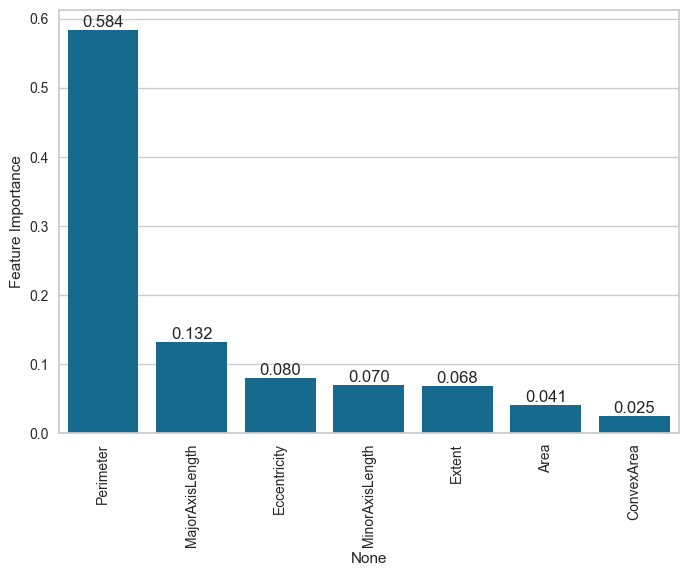

In [143]:
ax = sns.barplot(x=df_fi.index, y='Feature Importance', data=df_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

In [144]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [145]:
X2 = X.drop(columns = ["Perimeter"])

In [146]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

In [147]:
operations = [("DT_model", DecisionTreeClassifier(random_state=101))]
pipe_model2 = Pipeline(steps=operations)
pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('DT_model', DecisionTreeClassifier(random_state=101))])

In [148]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2, "DT_drop")

DT_drop Test_Set
[[70 13]
 [18 79]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        83
           1       0.86      0.81      0.84        97

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180


DT_drop Train_Set
[[367   0]
 [  0 353]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       353

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [149]:
operations = [("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=["accuracy"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy
1,0.010389,0.006078,0.833333,1.0
2,0.012026,0.004842,0.833333,1.0
3,0.009356,0.004987,0.777778,1.0
4,0.009485,0.000000,0.763889,1.0
5,0.002996,0.000000,0.736111,1.0
6,0.007684,0.002405,0.791667,1.0
7,0.000000,0.008108,0.833333,1.0
8,0.011002,0.002555,0.805556,1.0
9,0.008114,0.000000,0.680556,1.0
10,0.009171,0.000000,0.791667,1.0


In [150]:
decision_tree_model = pipe_model2.named_steps["DT_model"]
feature_importances = decision_tree_model.feature_importances_
df2_fi = pd.DataFrame(data=feature_importances, index=X_train2.columns, columns=["Feature Importance"])
df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)
df2_fi

,Feature Importance
MajorAxisLength,0.659583
Extent,0.108328
Area,0.078781
Eccentricity,0.058278
ConvexArea,0.055832
MinorAxisLength,0.039198


##### ***Find Best Parameters***

In [151]:
operations = [("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [152]:
param_grid = {
    "DT_model__splitter": ["best", "random"],
    "DT_model__max_features": [None, "auto", "sqrt", "log2", 2, 3, 4, 5, 6, 7],
    "DT_model__max_depth": [None, 2, 3, 4, 5, 6],
    "DT_model__min_samples_leaf": [1, 2, 3, 4],
    "DT_model__min_samples_split": [2, 3, 4],
    "DT_model__criterion": ["gini", "entropy"]
}

In [153]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [154]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__criterion': ['gini', 'entropy'],
                         'DT_model__max_depth': [None, 2, 3, 4, 5, 6],
                         'DT_model__max_features': [None, 'auto', 'sqrt',
                                                    'log2', 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4],
                         'DT_model__min_samples_split': [2, 3, 4],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [155]:
grid_model.best_index_

360

In [156]:
pd.DataFrame(grid_model.cv_results_).loc[360, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.866667
mean_train_score    0.869599
Name: 360, dtype: object

In [157]:
grid_model.best_score_

0.8666666666666666

In [158]:
grid_model.best_params_

{'DT_model__criterion': 'gini',
 'DT_model__max_depth': 2,
 'DT_model__max_features': 3,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'best'}

In [159]:
grid_model.best_estimator_

Pipeline(steps=[('DT_model',
                 DecisionTreeClassifier(max_depth=2, max_features=3,
                                        random_state=101))])

In [160]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, "DT_best")

DT_best Test_Set
[[70 13]
 [ 9 88]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        83
           1       0.87      0.91      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


DT_best Train_Set
[[325  42]
 [ 52 301]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       367
           1       0.88      0.85      0.86       353

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [161]:
operations = [("DT_model",
               DecisionTreeClassifier(max_depth=2,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=101,
                                      max_features=3
                                     ))]
scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.866667
train_accuracy           0.869599
test_precision_micro     0.866667
train_precision_micro    0.869599
test_recall_micro        0.866667
train_recall_micro       0.869599
test_f1_micro            0.866667
train_f1_micro           0.869599
dtype: float64

#### ***Compare Models Performance***

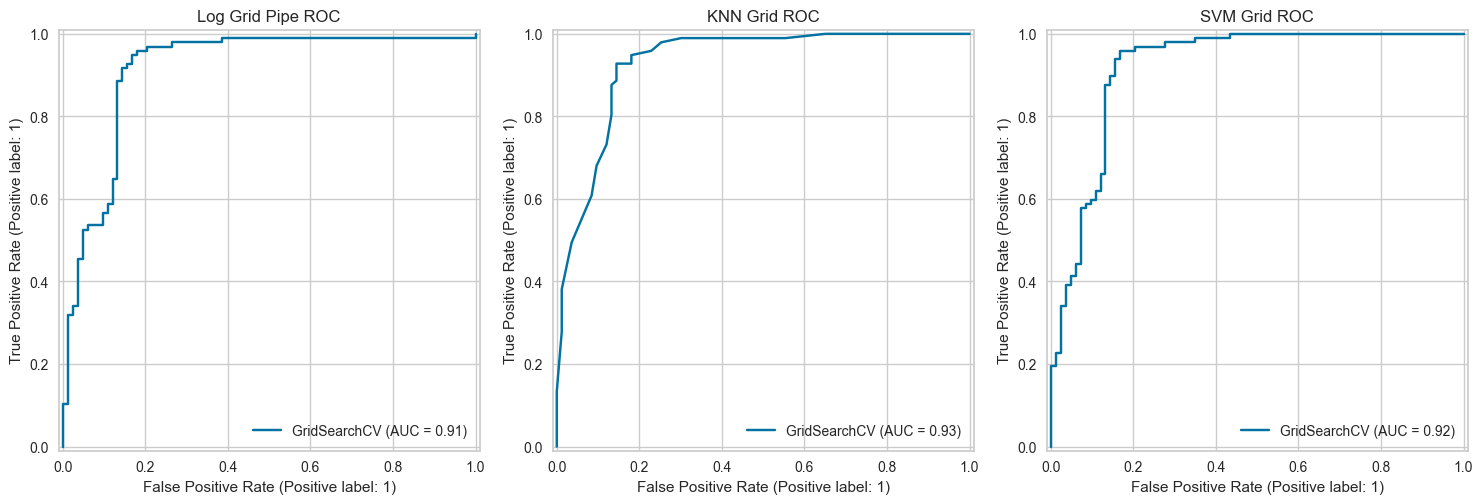

In [162]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

log_grid_ROC.plot(ax=ax[0])
ax[0].set_title("Log Grid Pipe ROC")
knn_grid_ROC.plot(ax=ax[1])
ax[1].set_title("KNN Grid ROC")
svm_grid_ROC.plot(ax=ax[2])
ax[2].set_title("SVM Grid ROC")

plt.tight_layout()
plt.show()

#### ***Final Model and Model Deployment***

In [163]:
param_grid = {'SVC__C': [0.5],
              'SVC__gamma':["scale"],
              'SVC__kernel':['rbf'],
              'SVC__class_weight': ["balanced"]}

In [164]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

final_model = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1).fit(X, y)

In [165]:
import pickle
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [166]:
new_model = pickle.load(open("final_pipe_model", "rb"))
new_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5], 'SVC__class_weight': ['balanced'],
                         'SVC__gamma': ['scale'], 'SVC__kernel': ['rbf']},
             return_train_score=True, scoring='recall')

#### ***Prediction***

In [167]:
df.loc[[182, 725, 166]]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
182,63968,333.012421,247.888546,0.667754,65403,0.757000,953.445,1
725,79397,434.994082,235.519493,0.840745,83074,0.696117,1148.633,0
166,51683,325.239868,208.914825,0.766419,54510,0.728443,928.217,1


In [168]:
my_dict = {
    'Area': [63968, 79397, 51683],
    'MajorAxisLength': [333.012421, 434.994082, 325.239868],
    'MinorAxisLength': [247.888546, 235.519493, 208.914825],
    'Eccentricity': [0.667754, 0.840745, 0.766419],
    'ConvexArea': [65403, 83074, 54510],
    'Extent': [0.757, 0.696117, 0.728443],
    'Perimeter': [953.445, 1148.633, 928.217]
}

In [169]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,63968,333.012421,247.888546,0.667754,65403,0.757000,953.445
1,79397,434.994082,235.519493,0.840745,83074,0.696117,1148.633
2,51683,325.239868,208.914825,0.766419,54510,0.728443,928.217


In [170]:
new_model.predict(sample)

array([1, 0, 1])

In [171]:
new_model.decision_function(sample)
# The SVC prediction operation is performed using the decision_function method.
# Positive values indicate class 1, while negative values indicate class 0.
# The larger the absolute value, the farther the observation is from the hyperplane.

array([ 1.69650528, -0.23482387,  1.51836999])

#### ***Conclusion***

In [172]:
#   SVM grid        accuracy :  0.89   roc_auc=0.92    19  wrong prediction

When deciding which of these models to choose, there are several important points to consider:

1. Accuracy
    - Logistic Regression: 0.89
    - KNN: 0.89
    - SVM: 0.89
    - Decision Tree: 0.88

2. AUC (Area Under the ROC Curve)
    - Logistic Regression: 0.91
    - KNN: 0.93
    - SVM: 0.92
    - Decision Tree: AUC value is lower compared to the others.

3. Other Metrics (Precision, Recall, F1-score)
    - Logistic Regression and KNN models generally have balanced precision, recall, and F1-score values.
    - The SVM model has a higher F1-score for class 1 compared to the others.
    - The Decision Tree model generally has lower precision and recall values compared to the other models.

4. Overfitting
    - Logistic Regression: Training set accuracy: 0.86, Test set accuracy: 0.89
    - KNN: Training set accuracy: 0.86, Test set accuracy: 0.89
    - SVM: Training set accuracy: 0.87, Test set accuracy: 0.89
    - Decision Tree: Training set accuracy: 0.87, Test set accuracy: 0.88

***Decision***

- SVM and KNN models generally have the highest accuracy and AUC values, so these two models can be evaluated first. However:
    - The SVM model's ROC AUC value is 0.92, which shows slightly higher performance.
    - The KNN model's ROC AUC value is 0.93, which is also quite good.

- If maintaining the balance between classes and overall performance is important, you may prefer the SVM model because it has balanced and generally high precision, recall, and F1-score values.

- If the Area Under the ROC Curve (AUC) is your most important performance criterion, the KNN model can also be preferred.


***In my work, maintaining the balance between classes and overall performance is important, so I chose the SVM model.***

***